In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
tmy_22 = pd.read_csv("1004150_40.17_-82.78_tmy-2022.csv", header=2)
tmy_22['Year']=2022
tmy_22['datetime'] = pd.to_datetime(tmy_22[['Year', 'Month', 'Day', 'Hour', 'Minute']])
tmy_22.to_csv("2022 edited data.csv")

# Dividing the data set into four datasets, from Jan to mar, apr-jun, jul-sep, oct-dec and calculating average and plotting

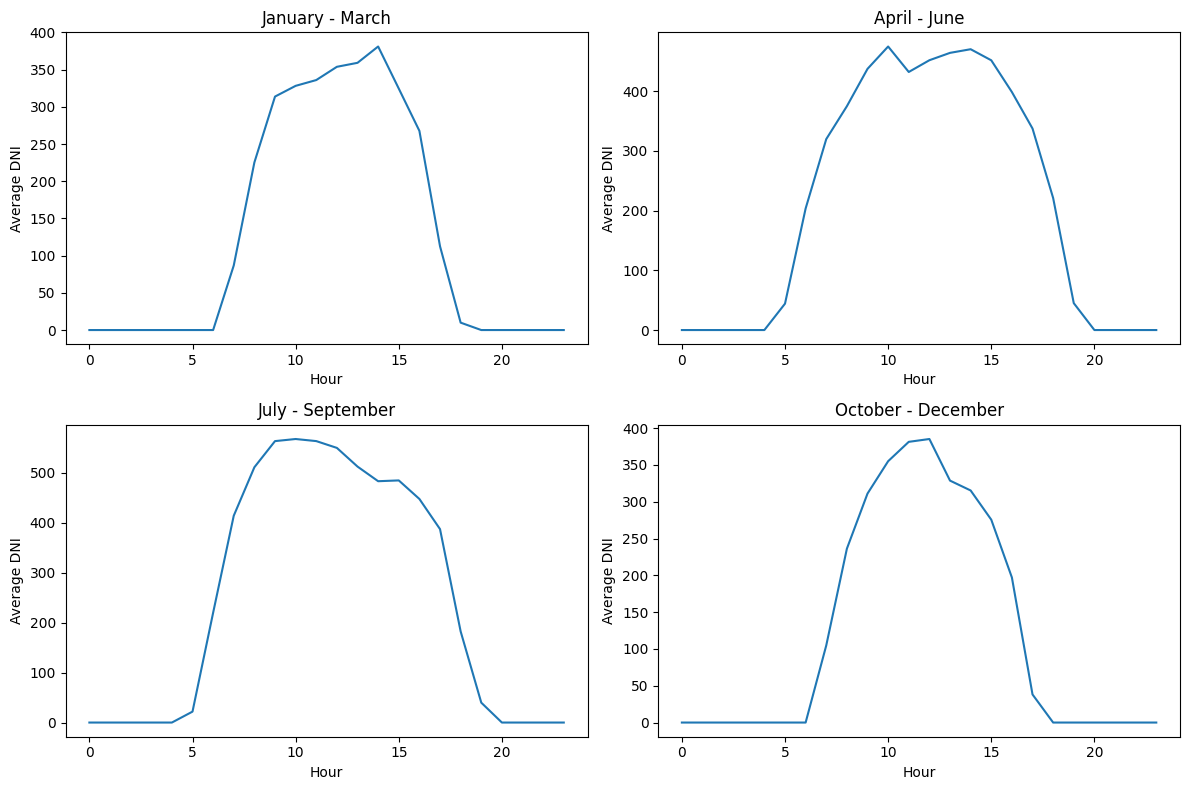

In [130]:
# Filter the data into four datasets
jan_mar = tmy_22[tmy_22['Month'].isin([1, 2, 3])]
apr_jun = tmy_22[tmy_22['Month'].isin([4, 5, 6])]
jul_sep = tmy_22[tmy_22['Month'].isin([7, 8, 9])]
oct_dec = tmy_22[tmy_22['Month'].isin([10, 11, 12])]

# Function to calculate average DNI for each hour
def avg_dni_per_hour(data):
    avg_dni = data.groupby('Hour')['DNI'].mean().reindex(np.arange(24)).fillna(0)
    return avg_dni

# Apply the function to each dataset
avg_dni_jan_mar = avg_dni_per_hour(jan_mar)
avg_dni_apr_jun = avg_dni_per_hour(apr_jun)
avg_dni_jul_sep = avg_dni_per_hour(jul_sep)
avg_dni_oct_dec = avg_dni_per_hour(oct_dec)


# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot average DNI for each dataset
axs[0, 0].plot(avg_dni_jan_mar.index, avg_dni_jan_mar.values)
axs[0, 0].set_title('January - March')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Average DNI')

axs[0, 1].plot(avg_dni_apr_jun.index, avg_dni_apr_jun.values)
axs[0, 1].set_title('April - June')
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Average DNI')

axs[1, 0].plot(avg_dni_jul_sep.index, avg_dni_jul_sep.values)
axs[1, 0].set_title('July - September')
axs[1, 0].set_xlabel('Hour')
axs[1, 0].set_ylabel('Average DNI')

axs[1, 1].plot(avg_dni_oct_dec.index, avg_dni_oct_dec.values)
axs[1, 1].set_title('October - December')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Average DNI')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Calculating average without dividing and plotting

In [131]:
# # Calculate the average DNI for each hour across the entire year
# avg_dni = tmy_22.groupby('Hour')['DNI'].mean().reindex(np.arange(24)).fillna(0)

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot average DNI vs hour
# ax.plot(avg_dni.index, avg_dni.values)
# ax.set_title('Average DNI vs Hour (Entire Year)')
# ax.set_xlabel('Hour')
# ax.set_ylabel('Average DNI')

# # Show the plot
# plt.show()